In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

If you cannot install nglview do not worry, all the visualization can also be done in VMD. For the software we are going to use today you need to change the path towards the folder called `pymdna`, which contains all the code needed for this tutorial.

In [2]:
import sys
# sys.path.append('/Users/crazycatman/biomolecularmodelling/assignments/dna/pymdna/')
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [3]:
pdb = md.load('./data/1bna.pdb')
pdb.center_coordinates(), pdb.top

(<mdtraj.Trajectory with 1 frames, 486 atoms, 24 residues, and unitcells at 0x17e797150>,
 <mdtraj.Topology with 2 chains, 24 residues, 486 atoms, 522 bonds at 0x17dc15150>)

In [4]:
view = nv.show_mdtraj(pdb)
view

NGLWidget()

To get some general idea of what is "inside" the pdb and topology we can loop over the residues and print some information.

In [5]:
print('res\tname\tindex\tchainid\tatoms')
for res in pdb.top.residues:
    print(f"{res}\t{res.name}\t{res.index}\t{res.chain.index}\t{' '.join([at.name for at in res.atoms])}")

res	name	index	chainid	atoms
DC1	DC	0	0	O5' C5' C4' O4' C3' O3' C2' C1' N1 C2 O2 N3 C4 N4 C5 C6
DG2	DG	1	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N9 C8 N7 C5 C6 O6 N1 C2 N2 N3 C4
DC3	DC	2	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N1 C2 O2 N3 C4 N4 C5 C6
DG4	DG	3	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N9 C8 N7 C5 C6 O6 N1 C2 N2 N3 C4
DA5	DA	4	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N9 C8 N7 C5 C6 N6 N1 C2 N3 C4
DA6	DA	5	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N9 C8 N7 C5 C6 N6 N1 C2 N3 C4
DT7	DT	6	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N1 C2 O2 N3 C4 O4 C5 C7 C6
DT8	DT	7	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N1 C2 O2 N3 C4 O4 C5 C7 C6
DC9	DC	8	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N1 C2 O2 N3 C4 N4 C5 C6
DG10	DG	9	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N9 C8 N7 C5 C6 O6 N1 C2 N2 N3 C4
DC11	DC	10	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N1 C2 O2 N3 C4 N4 C5 C6
DG12	DG	11	0	P OP1 OP2 O5' C5' C4' O4' C3' O3' C2' C1' N9 C8 N7 C5 C6 O6 N1 C2 N2 N3 C

To analyze the grooves we can do the following:

In [6]:
grooves = mdna.GrooveAnalysis(pdb,points=40)

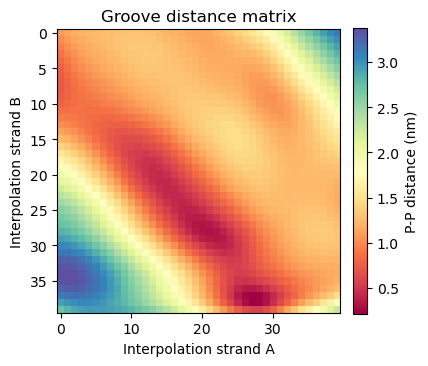

In [7]:
def plot_distance_matrix(distance_matrix):
    plt.figure(figsize=(4, 4))
    plt.imshow(distance_matrix, cmap='Spectral')
    plt.xlabel('Interpolation strand A')
    plt.ylabel('Interpolation strand B')
    plt.colorbar(label='P-P distance (nm)', fraction=0.046, pad=0.04)
    plt.title('Groove distance matrix')


distance_matrix = grooves.distance_matrices[0]
plot_distance_matrix(distance_matrix)

/Users/thor/surfdrive/Projects/pymdna/pymdna/analysis.py:170: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(groove, axis=0)
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0, 0.5, 'Groove width (nm)')

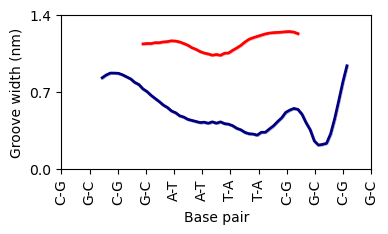

In [8]:
fig,ax = plt.subplots(figsize=[4,2])
grooves.plot_groove_widths(ax=ax,lw=2,c_major='red',c_minor='navy')
ax.set_ylim(0,1.4)
ax.set_yticks([0,0.7,1.4])

ax.set_xlabel('Base pair',fontsize=10)
ax.set_ylabel('Groove width (nm)',fontsize=10)

# uncomment if you want to save your figure
#fig.savefig('groove_widths_1bna.png',dpi=300,bbox_inches='tight')

In [9]:
''.join([res.name[1] for res in pdb.top.chain(0).residues])

'CGCGAATTCGCG'

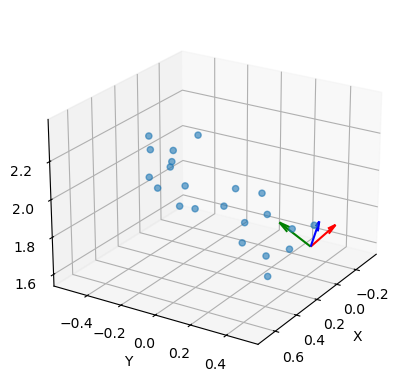

In [10]:
# Select atom indices of the last base
residue_indices = [at.index for at in pdb.topology.residue(-1).atoms]

# Create a ReferenceBase object containing the reference triad 
ref = mdna.ReferenceBase(pdb.atom_slice(residue_indices))

# Make a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reference triad
ref.plot_baseframe(ax=ax,length=0.2)
ax.axis('equal')
ax.view_init(elev=23, azim=32)

(12, 4, 3)


(-2.4223525524139404,
 2.3760130405426025,
 -2.2819681838154793,
 2.5163974091410637,
 -1.8255908489227293,
 1.7731833457946775)

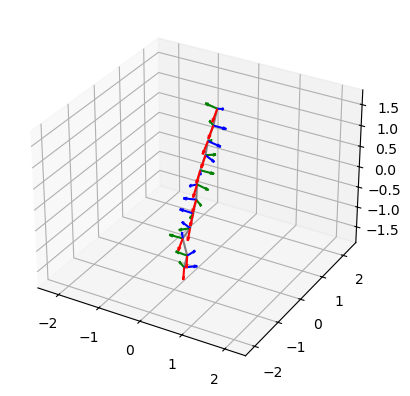

In [11]:
rigid = mdna.NucleicFrames(pdb)
frames = rigid.mean_reference_frames[:,0,:,:]
print(frames.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(*frames[:,0,:].T,c='gray')
ax.quiver(*frames[:,0,:].T, *frames[:,1,:].T, color='g',length=0.3)
ax.quiver(*frames[:,0,:].T, *frames[:,2,:].T, color='b',length=0.3)
ax.quiver(*frames[:,0,:].T, *frames[:,3,:].T, color='r',length=0.3)

ax.axis('equal')

In [12]:
%matplotlib inline
params, names = rigid.get_paramters()
print(params.shape, names)

(1, 12, 12) ['shear', 'stretch', 'stagger', 'buckle', 'propeller', 'opening', 'shift', 'slide', 'rise', 'tilt', 'roll', 'twist']


Text(0.5, -0.05, 'DNA base pair')

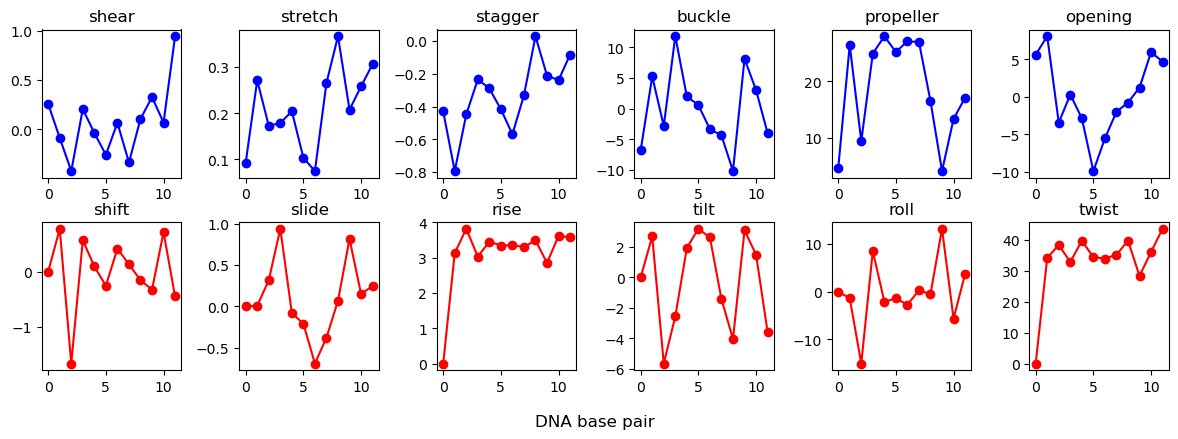

In [13]:
# Confidence intervals 
from scipy.stats import t

fig, ax = plt.subplots(2,6,figsize=(12,4))
fig.tight_layout()
ax = ax.flatten()
M = np.mean(params, axis=0)
S = np.std(params, axis=0)
n = params.shape[0]
ci = t.ppf(0.975, df=n-1) * S / np.sqrt(n)
x = np.arange(0, params.shape[1])
for _, i in enumerate(M.T):
    if _ >= 6:
        c1, c2 = 'red','coral'
    else:
        c1, c2 = 'blue','cornflowerblue'
    ax[_].plot(i[::-1], '-o',color=c1)
    ax[_].fill_between(x, (i-ci[_])[::-1], (i+ci[_])[::-1], color=c2, alpha=0.2)
    ax[_].set_title(names[_])

fig.supxlabel('DNA base pair',y=-0.05)

In [14]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns


def compute_curvature(points):
    # Calculate first derivatives along the points axis within each frame
    d_points = np.gradient(points, axis=1)
    
    # Compute unit tangent (T) and its derivative (T')
    # Norm calculation is along the last axis (x,y,z components), keepdims=True to maintain dimensions for broadcasting
    norm_d_points = np.linalg.norm(d_points, axis=-1, keepdims=True)
    T = d_points / norm_d_points
    dT = np.gradient(T, axis=1)
    
    # Compute curvature
    # The cross product and norm are computed along the last axis (x,y,z components)
    # The norm of d_points used in the denominator should also consider the correct axis for broadcasting
    curvature = np.linalg.norm(np.cross(dT, T), axis=-1) / np.power(norm_d_points[..., 0], 3)
    
    return curvature

Text(0, 0.5, 'Curvature $[1/nm]$')

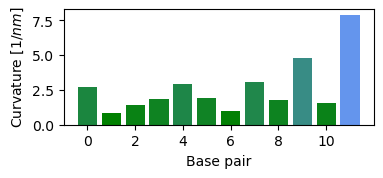

In [15]:
# use origins of mean reference frames (mid triads of base pairs)
frames = rigid.mean_reference_frames
origins = frames[:,:,0].swapaxes(0,1)
curvature = compute_curvature(origins)

# Create a colormap using seaborn
cmap = sns.blend_palette(('green', 'cornflowerblue'), as_cmap=True)

# Normalize the curvature data to fit within the colormap's range
norm = mcolors.Normalize(vmin=curvature.min(), vmax=curvature.max())

# Create a ScalarMappable with the normalization and colormap
smappable = cm.ScalarMappable(norm=norm, cmap=cmap)

# Map each curvature value to a color using the ScalarMappable
colors = smappable.to_rgba(curvature[0])

# Create the plot
fig, ax = plt.subplots(figsize=[4, 1.5])
bars = ax.bar(x=range(len(curvature[0])), height=curvature[0], color=colors)
ax.set_xlabel('Base pair')
ax.set_ylabel('Curvature $[1/nm]$')